In [11]:
import os, sys
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import glob
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

In [ ]:
# import local library
import sys; sys.path.append(cur_dir + '/ImagPrep/')


In [12]:
# list dirs
cur_dir = os.getcwd()
print(cur_dir)
ann_dir = cur_dir + '/VOC2007/Annotations/'
print(ann_dir)

/Users/sasali/Deepworld/CV
/Users/sasali/Deepworld/CV/VOC2007/Annotations/


In [20]:
import os, sys
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import glob

# convert coordinates to ratios relative to the image size
def convert(size, box):
    """
    size - (width, height) of the image
    box - (xmin, ymin, xmax, ymax) coordinates
    """
    dw = 1./size[0]
    dh = 1./size[1]
    x = (box[0] + box[2])/2.0
    y = (box[1] + box[3])/2.0
    w = box[2] - box[0]
    h = box[3] - box[1]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

# Parse xml data and extract boxes
def xml2df(ann_dir, save_df_to_path, classes):
    """
    ann_dir - annotation xml file directory
    classes - object class array 
    save_df_to_path - the directory path where you save dataframe to
    """
    boxes = []
    for filename in glob.iglob(ann_dir +'*.xml'):
        with open(filename) as in_file:
            xml_tree = ET.parse(in_file)
            root = xml_tree.getroot()
            size = root.find('size')
            width = int(size.find('width').text)
            height = int(size.find('height').text)
        
            for obj in root.iter('object'):
                difficult = obj.find('difficult').text
                label = obj.find('name').text
                if label not in classes or int(difficult) == 1:  # exclude difficult or unlisted classes
                    continue
                xml_box = obj.find('bndbox')
                bbox = (int(xml_box.find('xmin').text),
                        int(xml_box.find('ymin').text), 
                        int(xml_box.find('xmax').text),
                        int(xml_box.find('ymax').text))
            
                bbox_converted = convert((width, height), bbox) # convert coords to ratios
                bbox_c = (os.path.splitext(os.path.basename(in_file.name))[0], classes.index(label)) + bbox_converted
                
                boxes.append(list(bbox_c))
                
    boxes_df = pd.DataFrame(boxes, columns=['fname', 'label', 'x', 'y', 'w', 'h']) 
    boxes_df.to_csv(save_df_to_path) # save to csv 
        
    return boxes_df

In [21]:
# List all the object classes
classes = ["aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat",
           "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person",
           "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

save_df_to_path = ann_dir + 'anno_converted.csv'
boxes_df = xml2df(ann_dir, save_df_to_path, classes)

In [22]:
boxes_df

,fname,label,x,y,w,h
0,007826,10,0.400000,0.653333,0.480000,0.149333
1,007826,8,0.454000,0.692000,0.120000,0.354667
2,007826,8,0.570000,0.658667,0.108000,0.357333
3,007826,8,0.103000,0.737333,0.166000,0.434667
4,007826,8,0.325000,0.832000,0.322000,0.320000
5,002786,12,0.428000,0.555723,0.536000,0.527108
6,002786,14,0.459000,0.382530,0.114000,0.451807
7,006286,14,0.485000,0.617333,0.650000,0.765333
8,006286,14,0.911000,0.474667,0.078000,0.165333
9,006286,14,0.809000,0.448000,0.094000,0.122667


In [124]:
box_wh_df = boxes_df.iloc[:, 4:]

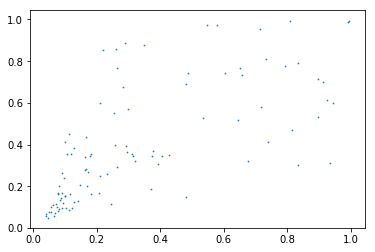

In [61]:
plt.scatter(box_wh_df['w'][:100,], box_wh_df['h'][:100,], s=0.5)

In [31]:
def IOU_kmeans(x, centroids):
    """
    x - [w, h] sample
    centroids - 5by2 centroid array
    """
    IOUs = []
    k = len(centroids)
    
    for centroid in centroids:
        c_w, c_h = centroid
        w, h = x
        inter_area = np.minimum(c_w, w) * np.minimum(c_h, h)
        union_area = c_w*c_h + w*h - inter_area
        iou = inter_area/union_area
        IOUs.append(iou) # will become (k,) shape
    return np.array(IOUs)

In [37]:
# Example
centroids = np.random.uniform(0,1,(5,2))
x = (0.480000, 0.149333)
ious = IOU_kmeans(x, centroids)
dis = 1 - ious
dis

array([ 0.84190625,  0.89584659,  0.90879847,  0.84540084,  0.84276581])

In [141]:
def do_kmeans(X, centroids, N_iterations):
    """
    X - sample array (box w & h)
    centroids - centroid array
    eps - loss convergence threshold
    """
    # Initialize
    N = X.shape[0]
    iterations = 0
    k, dim = centroids.shape
    prev_assignments = np.ones(N)*(-1)    
    old_D = np.zeros((N,k))
    loss = 0

    while True:
        Dis = [] # distance array
        iterations += 1           
        for i in range(N):
            dis = 1 - IOU_kmeans(X.iloc[i, :], centroids)
            Dis.append(dis)
        Dis = np.array(Dis) # D.shape = (N,k)
        
        #assign samples to centroids 
        assignments = np.argmin(Dis, axis=1)
        loss = sum(np.amin(Dis, axis=1))
        print("iter {}: loss = {}".format(iterations, loss))
        
        if (assignments == prev_assignments).all() or iterations > N_iterations:
            print('K-means clustering Done')
            print("Centroids = ", centroids)            
            return (centroids, assignments, Losses)

        # Calculate new centroids
        centroid_sums = np.zeros((k,dim), np.float)
        for i in range(N):
            centroid_sums[assignments[i]] += X.iloc[i, :]   
        #print(centroid_sums)
        
        for j in range(k):            
            centroids[j] = centroid_sums[j]/(np.sum(assignments==j))
        
        prev_assignments = assignments.copy()     
        old_D = Dis.copy() 

        
def plot_kmeans_clustering(X, centroids, assignments):
    plt.scatter(X[:, 0], X[:, 1], c=assignments, s=0.5, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=10, alpha=0.5)


iter 1: loss = 58.50436717809583
iter 2: loss = 46.69611300895538
iter 3: loss = 43.01716262989763
iter 4: loss = 41.82720025832637
iter 5: loss = 40.38601419807671
iter 6: loss = 39.432028865117346
iter 7: loss = 38.81965611396915
iter 8: loss = 38.4192732503407
iter 9: loss = 37.04828896136193
iter 10: loss = 36.54018885622198
iter 11: loss = 36.27562604556403
K-means clustering Done
Centroids =  [[ 0.7904231   0.77405712]
 [ 0.319       0.74814879]
 [ 0.20575596  0.32503853]
 [ 0.08901563  0.12198699]
 [ 0.569       0.355532  ]]


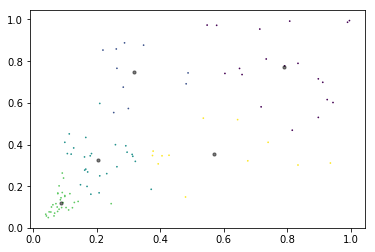

In [142]:
centroids = np.random.uniform(0,1,(5,2))
N_iterations = 100
centroids, assignments, Losses = do_kmeans(box_wh_df.iloc[:100, :], centroids, N_iterations)
plot_kmeans_clustering(np.array(box_wh_df.iloc[:100, :]), centroids, assignments)

In [143]:
def init_centroids(boxes, K):
    '''
    Using K_means++ to initialize centroids
    boxes - input box df
    K - number of clusters
    ''' 
    
    boxes_num = len(boxes)

    centroid_index = np.random.choice(boxes_num, 1)
    centroids = [boxes[centroid_index,'w'], boxes[centroid_index,'h']]
    print(centroids)

    for centroid_index in range(0,K-1):

        sum_distance = 0
        distance_thresh = 0
        distance_list = []
        cur_sum = 0

        for box in boxes:
            distances = 1 - IOU_kmeans(box, centroids)
            min_distance = np.minimum(distances)
            sum_distance += min_distance
            distance_list.append(min_distance)

        distance_thresh = sum_distance*np.random.random()

        for i in range(0, boxes_num):
            cur_sum += distance_list[i]
            if cur_sum > distance_thresh:
                centroids.append(boxes[i])
                print(boxes[i,0], boxes[i,1])
                break

    return centroids


In [148]:
#init_centroids(box_wh_df.iloc[:100, :], K=5)

boxes_num = len(box_wh_df)

centroid_index = np.random.choice(boxes_num, 1)
centroids = np.array(box_wh_df)[centroid_index,:]
print(centroids)

[[ 0.19868996  0.298     ]]


In [134]:
np.array(box_wh_df)[67,:]

array([ 0.936,  0.312])